<a href="https://colab.research.google.com/github/OleksandrZadvornyi/weather-forecasting/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q transformers

In [3]:
!pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cud

In [4]:
!pip install -q evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.4 MB/s eta 0:00:00


In [5]:
!pip install -q accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.3 MB/s eta 0:00:00


In [6]:
!pip install -q gluonts ujson

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.7 MB/s eta 0:00:00


In [7]:
from datasets import load_from_disk

# Load datasets
data_dir = "/content/drive/MyDrive/weather_forecasting_project/prepared_datasets"

dataset = load_from_disk(f"{data_dir}/dataset")

print(f"Train dataset: {len(dataset['train'])} time series")
print(f"Validation dataset: {len(dataset['validation'])} time series")
print(f"Test dataset: {len(dataset['test'])} time series")

Train dataset: 28 time series
Validation dataset: 28 time series
Test dataset: 28 time series


In [8]:
dataset

DatasetDict({
    train: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'feat_static_real', 'item_id'],
        num_rows: 28
    })
    validation: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'feat_static_real', 'item_id'],
        num_rows: 28
    })
    test: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'feat_static_real', 'item_id'],
        num_rows: 28
    })
})

In [9]:
train_example = dataset["train"][0]
train_example.keys()

dict_keys(['start', 'target', 'feat_static_cat', 'feat_static_real', 'item_id'])

In [10]:
print(train_example["start"])
print(train_example["target"])

1959-01-06 00:00:00
[1.100000023841858, 2.440000057220459, 3.7799999713897705, 5.119999885559082, 6.460000038146973, 7.800000190734863, 6.460000038146973, 5.119999885559082, 3.7799999713897705, 2.440000057220459, 1.100000023841858, -6.099999904632568, -5.769999980926514, -5.440000057220459, -5.110000133514404, -4.78000020980835, -4.449999809265137, -4.119999885559082, -3.7899999618530273, -1.0, -1.0, -2.799999952316284, -2.790175437927246, -2.780350923538208, -2.77052640914917, -2.7607016563415527, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.60000002384185

In [11]:
validation_example = dataset["validation"][0]
validation_example.keys()

dict_keys(['start', 'target', 'feat_static_cat', 'feat_static_real', 'item_id'])

In [12]:
print(validation_example["start"])
print(validation_example["target"])

1959-01-06 00:00:00
[1.100000023841858, 2.440000057220459, 3.7799999713897705, 5.119999885559082, 6.460000038146973, 7.800000190734863, 6.460000038146973, 5.119999885559082, 3.7799999713897705, 2.440000057220459, 1.100000023841858, -6.099999904632568, -5.769999980926514, -5.440000057220459, -5.110000133514404, -4.78000020980835, -4.449999809265137, -4.119999885559082, -3.7899999618530273, -1.0, -1.0, -2.799999952316284, -2.790175437927246, -2.780350923538208, -2.77052640914917, -2.7607016563415527, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.60000002384185

In [13]:
freq = "1D"
prediction_length = 30

#assert len(train_example["target"]) + prediction_length == len(
#    validation_example["target"]
#)

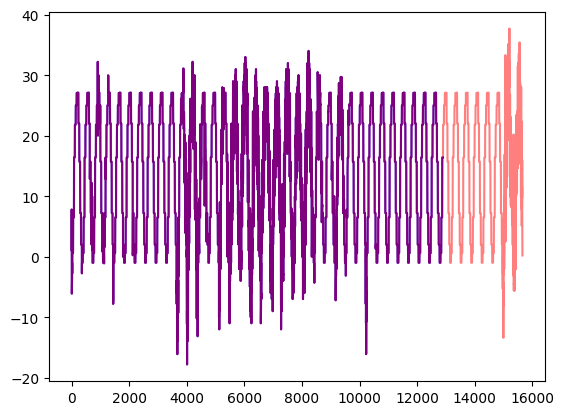

In [14]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots()
axes.plot(train_example["target"], color="blue")
axes.plot(validation_example["target"], color="red", alpha=0.5)

plt.show()

In [15]:
train_dataset = dataset["train"]
test_dataset = dataset["test"]

In [16]:
from functools import lru_cache

import pandas as pd
import numpy as np

@lru_cache(10_000)
def convert_to_pandas_period(date, freq):
    return pd.Period(date, freq)

def transform_start_field(batch, freq):
    batch["start"] = [convert_to_pandas_period(date, freq) for date in batch["start"]]
    return batch

In [17]:
from functools import partial

train_dataset.set_transform(partial(transform_start_field, freq=freq))
test_dataset.set_transform(partial(transform_start_field, freq=freq))

In [18]:
from gluonts.time_feature import get_lags_for_frequency

lags_sequence = get_lags_for_frequency(freq)
print(lags_sequence)

[1, 2, 3, 4, 5, 6, 7, 8, 13, 14, 15, 20, 21, 22, 27, 28, 29, 30, 31, 56, 84, 363, 364, 365, 727, 728, 729, 1091, 1092, 1093]


In [19]:
from gluonts.time_feature import time_features_from_frequency_str

time_features = time_features_from_frequency_str(freq)
print(time_features)

[<function day_of_week at 0x7e346f3f5580>, <function day_of_month at 0x7e346f3f56c0>, <function day_of_year at 0x7e346f3f5800>]


In [20]:
from transformers import TimeSeriesTransformerConfig, TimeSeriesTransformerForPrediction

config = TimeSeriesTransformerConfig(
    prediction_length=prediction_length,
    context_length=prediction_length * 2,
    lags_sequence=lags_sequence,
    num_time_features=len(time_features) + 1,  # Add 1 for age feature
    num_static_categorical_features=1,
    num_static_real_features=3,  # Latitude, longitude, elevation
    cardinality=[len(train_dataset)],  # Number of unique time series
    embedding_dimension=[2],  # Dimension of categorical embedding

    encoder_layers=4,
    decoder_layers=4,
    d_model=64,
)

model = TimeSeriesTransformerForPrediction(config)

In [21]:
model.config.distribution_output

'student_t'

In [22]:
from gluonts.time_feature import (
    time_features_from_frequency_str,
    TimeFeature,
    get_lags_for_frequency,
)
from gluonts.dataset.field_names import FieldName
from gluonts.transform import (
    AddAgeFeature,
    AddObservedValuesIndicator,
    AddTimeFeatures,
    AsNumpyArray,
    Chain,
    ExpectedNumInstanceSampler,
    InstanceSplitter,
    RemoveFields,
    SelectFields,
    SetField,
    TestSplitSampler,
    Transformation,
    ValidationSplitSampler,
    VstackFeatures,
    RenameFields,
)

In [23]:
from transformers import PretrainedConfig

def create_transformation(freq: str, config: PretrainedConfig) -> Transformation:
    remove_field_names = []
    if config.num_static_real_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_REAL)
    if config.num_dynamic_real_features == 0:
        remove_field_names.append(FieldName.FEAT_DYNAMIC_REAL)
    if config.num_static_categorical_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_CAT)

    return Chain(
        [RemoveFields(field_names=remove_field_names)]
        + (
            [
                AsNumpyArray(
                    field=FieldName.FEAT_STATIC_CAT,
                    expected_ndim=1,
                    dtype=int,
                )
            ]
            if config.num_static_categorical_features > 0
            else []
        )
        + (
            [
                AsNumpyArray(
                    field=FieldName.FEAT_STATIC_REAL,
                    expected_ndim=1,
                )
            ]
            if config.num_static_real_features > 0
            else []
        )
        + [
            AsNumpyArray(
                field=FieldName.TARGET,
                expected_ndim=1 if config.input_size == 1 else 2,
            ),
            AddObservedValuesIndicator(
                target_field=FieldName.TARGET,
                output_field=FieldName.OBSERVED_VALUES,
            ),
            AddTimeFeatures(
                start_field=FieldName.START,
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_TIME,
                time_features=time_features_from_frequency_str(freq),
                pred_length=config.prediction_length,
            ),
            AddAgeFeature(
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_AGE,
                pred_length=config.prediction_length,
                log_scale=True,
            ),
            VstackFeatures(
                output_field=FieldName.FEAT_TIME,
                input_fields=[FieldName.FEAT_TIME, FieldName.FEAT_AGE]
                + (
                    [FieldName.FEAT_DYNAMIC_REAL]
                    if config.num_dynamic_real_features > 0
                    else []
                ),
            ),
            RenameFields(
                mapping={
                    FieldName.FEAT_STATIC_CAT: "static_categorical_features",
                    FieldName.FEAT_STATIC_REAL: "static_real_features",
                    FieldName.FEAT_TIME: "time_features",
                    FieldName.TARGET: "values",
                    FieldName.OBSERVED_VALUES: "observed_mask",
                }
            ),
        ]
    )

In [24]:
from gluonts.transform.sampler import InstanceSampler
from typing import Optional

def create_instance_splitter(
    config: PretrainedConfig,
    mode: str,
    train_sampler: Optional[InstanceSampler] = None,
    validation_sampler: Optional[InstanceSampler] = None,
) -> Transformation:
    assert mode in ["train", "validation", "test"]

    instance_sampler = {
        "train": train_sampler
        or ExpectedNumInstanceSampler(
            num_instances=1.0, min_future=config.prediction_length
        ),
        "validation": validation_sampler
        or ValidationSplitSampler(min_future=config.prediction_length),
        "test": TestSplitSampler(),
    }[mode]

    return InstanceSplitter(
        target_field="values",
        is_pad_field=FieldName.IS_PAD,
        start_field=FieldName.START,
        forecast_start_field=FieldName.FORECAST_START,
        instance_sampler=instance_sampler,
        past_length=config.context_length + max(config.lags_sequence),
        future_length=config.prediction_length,
        time_series_fields=["time_features", "observed_mask"],
    )

In [25]:
from typing import Iterable

import torch
from gluonts.itertools import Cached, Cyclic
from gluonts.dataset.loader import as_stacked_batches

def create_train_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    num_batches_per_epoch: int,
    shuffle_buffer_length: Optional[int] = None,
    cache_data: bool = True,
    **kwargs,
) -> Iterable:
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    TRAINING_INPUT_NAMES = PREDICTION_INPUT_NAMES + [
        "future_values",
        "future_observed_mask",
    ]

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train=True)
    if cache_data:
        transformed_data = Cached(transformed_data)

    instance_splitter = create_instance_splitter(config, "train")

    stream = Cyclic(transformed_data).stream()
    training_instances = instance_splitter.apply(stream)

    return as_stacked_batches(
        training_instances,
        batch_size=batch_size,
        shuffle_buffer_length=shuffle_buffer_length,
        field_names=TRAINING_INPUT_NAMES,
        output_type=torch.tensor,
        num_batches_per_epoch=num_batches_per_epoch,
    )

In [26]:
def create_backtest_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    **kwargs,
):
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data)

    # We create a Validation Instance splitter which will sample the very last
    # context window seen during training only for the encoder.
    instance_sampler = create_instance_splitter(config, "validation")

    # we apply the transformations in train mode
    testing_instances = instance_sampler.apply(transformed_data, is_train=True)

    return as_stacked_batches(
        testing_instances,
        batch_size=batch_size,
        output_type=torch.tensor,
        field_names=PREDICTION_INPUT_NAMES,
    )

In [27]:
train_dataloader = create_train_dataloader(
    config=config,
    freq=freq,
    data=train_dataset,
    batch_size=256,
    num_batches_per_epoch=100,
)

test_dataloader = create_backtest_dataloader(
    config=config,
    freq=freq,
    data=test_dataset,
    batch_size=64,
)

In [28]:
batch = next(iter(train_dataloader))
for k, v in batch.items():
    print(k, v.shape, v.type())

past_time_features torch.Size([256, 1153, 4]) torch.FloatTensor
past_values torch.Size([256, 1153]) torch.FloatTensor
past_observed_mask torch.Size([256, 1153]) torch.FloatTensor
future_time_features torch.Size([256, 30, 4]) torch.FloatTensor
static_categorical_features torch.Size([256, 1]) torch.LongTensor
static_real_features torch.Size([256, 3]) torch.FloatTensor
future_values torch.Size([256, 30]) torch.FloatTensor
future_observed_mask torch.Size([256, 30]) torch.FloatTensor


In [29]:
# perform forward pass
outputs = model(
    past_values=batch["past_values"],
    past_time_features=batch["past_time_features"],
    past_observed_mask=batch["past_observed_mask"],
    static_categorical_features=batch["static_categorical_features"]
    if config.num_static_categorical_features > 0
    else None,
    static_real_features=batch["static_real_features"]
    if config.num_static_real_features > 0
    else None,
    future_values=batch["future_values"],
    future_time_features=batch["future_time_features"],
    future_observed_mask=batch["future_observed_mask"],
    output_hidden_states=True,
)

In [30]:
print("Loss:", outputs.loss.item())

Loss: 4.209563732147217


In [31]:
from accelerate import Accelerator
from torch.optim import AdamW

accelerator = Accelerator()
device = accelerator.device

model.to(device)
optimizer = AdamW(model.parameters(), lr=6e-4, betas=(0.9, 0.95), weight_decay=1e-1)

model, optimizer, train_dataloader = accelerator.prepare(
    model,
    optimizer,
    train_dataloader,
)

model.train()
for epoch in range(40):
    epoch_loss = 0
    num_batches = 0

    for idx, batch in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(
            static_categorical_features=batch["static_categorical_features"].to(device)
            if config.num_static_categorical_features > 0
            else None,
            static_real_features=batch["static_real_features"].to(device)
            if config.num_static_real_features > 0
            else None,
            past_time_features=batch["past_time_features"].to(device),
            past_values=batch["past_values"].to(device),
            future_time_features=batch["future_time_features"].to(device),
            future_values=batch["future_values"].to(device),
            past_observed_mask=batch["past_observed_mask"].to(device),
            future_observed_mask=batch["future_observed_mask"].to(device),
        )
        loss = outputs.loss

        # Backpropagation
        accelerator.backward(loss)
        optimizer.step()

        epoch_loss += loss.item()
        num_batches += 1

        if idx % 10 == 0:
            print(f"Epoch {epoch}, Batch {idx}, Loss: {loss.item():.4f}")

    avg_epoch_loss = epoch_loss / num_batches
    print(f"Epoch {epoch} completed. Average loss: {avg_epoch_loss:.4f}")

Epoch 0, Batch 0, Loss: 4.1628
Epoch 0, Batch 10, Loss: 3.8906
Epoch 0, Batch 20, Loss: 3.8386
Epoch 0, Batch 30, Loss: 3.7166
Epoch 0, Batch 40, Loss: 3.5770
Epoch 0, Batch 50, Loss: 3.3975
Epoch 0, Batch 60, Loss: 3.1869
Epoch 0, Batch 70, Loss: 3.1391
Epoch 0, Batch 80, Loss: 3.1192
Epoch 0, Batch 90, Loss: 3.0189
Epoch 0 completed. Average loss: 3.4663
Epoch 1, Batch 0, Loss: 2.9424
Epoch 1, Batch 10, Loss: 3.0453
Epoch 1, Batch 20, Loss: 3.0750
Epoch 1, Batch 30, Loss: 2.9676
Epoch 1, Batch 40, Loss: 2.9139
Epoch 1, Batch 50, Loss: 2.8979
Epoch 1, Batch 60, Loss: 2.8409
Epoch 1, Batch 70, Loss: 2.8574
Epoch 1, Batch 80, Loss: 2.8054
Epoch 1, Batch 90, Loss: 2.7520
Epoch 1 completed. Average loss: 2.9111
Epoch 2, Batch 0, Loss: 2.7181
Epoch 2, Batch 10, Loss: 2.6810
Epoch 2, Batch 20, Loss: 2.7994
Epoch 2, Batch 30, Loss: 2.6522
Epoch 2, Batch 40, Loss: 2.6110
Epoch 2, Batch 50, Loss: 2.6956
Epoch 2, Batch 60, Loss: 2.7416
Epoch 2, Batch 70, Loss: 2.6173
Epoch 2, Batch 80, Loss: 2.

In [34]:
import os
import shutil

# Load metadata
with open(f"{data_dir}/metadata.txt", "r") as f:
    metadata = {}
    for line in f:
        key, value = line.strip().split("=")
        metadata[key] = value

target_column = metadata.get("target_column", "TMAX")

# Save the model and configuration
model_path = "/content/drive/MyDrive/weather_forecasting_project/weather_model"
config_path = "/content/drive/MyDrive/weather_forecasting_project/weather_model/config"

if os.path.exists(model_path):
    shutil.rmtree(model_path)

if os.path.exists(config_path):
    shutil.rmtree(config_path)

os.makedirs(model_path, exist_ok=True)
os.makedirs(config_path, exist_ok=True)

# Get the unwrapped model if using accelerator
unwrapped_model = accelerator.unwrap_model(model)

# Save model state dictionary
torch.save(unwrapped_model.state_dict(), os.path.join(model_path, "time_series_model.pth"))

# Save the configuration
unwrapped_model.config.to_json_file(os.path.join(config_path, "config.json"))

# Save frequency and prediction length for later use
with open(os.path.join(config_path, "metadata.txt"), "w") as f:
    f.write(f"freq={freq}\n")
    f.write(f"prediction_length={prediction_length}\n")
    f.write(f"target_column={target_column}\n")
    f.write(f"lags_sequence={lags_sequence}\n")

print(f"Model saved to {model_path}")
print(f"Configuration saved to {config_path}")

Model saved to /content/drive/MyDrive/weather_forecasting_project/weather_model
Configuration saved to /content/drive/MyDrive/weather_forecasting_project/weather_model/config
